In [1]:
import numpy as np
import pylab as plt
import random, datetime
import statsmodels.api as sm
from scipy.stats import norm
%matplotlib inline

In [2]:
import pandas as pd
df = pd.read_csv('nfl_draft.csv')

In [3]:
cols_to_drop = ['hof', 'position_standard', 'player_id', 'column_a', 'first4av', 'to', 'ap1', 'pb', 'st', 'carav', 'drav', 'g', 'cmp', 'pass_att', 'pass_td', 'pass_yds', 'pass_int', 'rush_att', 'rush_yds', 'rush_tds', 'rec', 'rec_yds', 'rec_tds', 'tkl', 'def_int', 'sk']
df = df.drop(cols_to_drop, axis=1)
print(df)

      year  rnd  pick   tm           player  pos   age college_univ
0     2015    1     1  TAM   Jameis Winston   QB  21.0  Florida St.
1     2015    1     2  TEN   Marcus Mariota   QB  21.0       Oregon
2     2015    1     3  JAX     Dante Fowler  OLB  21.0      Florida
3     2015    1     4  OAK     Amari Cooper   WR  21.0      Alabama
4     2015    1     5  WAS  Brandon Scherff    T  23.0         Iowa
...    ...  ...   ...  ...              ...  ...   ...          ...
8430  1985   12   332  RAI     Raymond Polk   DB   NaN          NaN
8431  1985   12   333  BUF    Paul Woodside    K   NaN          NaN
8432  1985   12   334  DEN        Dan Lynch    G   NaN          NaN
8433  1985   12   335  MIA        Ray Noble   DB   NaN          NaN
8434  1985   12   336  SFO   Donald Chumley   DT   NaN          NaN

[8435 rows x 8 columns]


In [4]:
first_round = df[df['rnd'] == 1]
print(first_round)

      year  rnd  pick   tm           player  pos   age college_univ
0     2015    1     1  TAM   Jameis Winston   QB  21.0  Florida St.
1     2015    1     2  TEN   Marcus Mariota   QB  21.0       Oregon
2     2015    1     3  JAX     Dante Fowler  OLB  21.0      Florida
3     2015    1     4  OAK     Amari Cooper   WR  21.0      Alabama
4     2015    1     5  WAS  Brandon Scherff    T  23.0         Iowa
...    ...  ...   ...  ...              ...  ...   ...          ...
8122  1985    1    24  NOR      Alvin Toles   LB  22.0          NaN
8123  1985    1    25  CIN     Emanuel King   LB  22.0          NaN
8124  1985    1    26  DEN     Steve Sewell   RB  22.0          NaN
8125  1985    1    27  MIA  Lorenzo Hampton   RB  23.0          NaN
8126  1985    1    28  NWE    Trevor Matich    C  23.0          NaN

[938 rows x 8 columns]


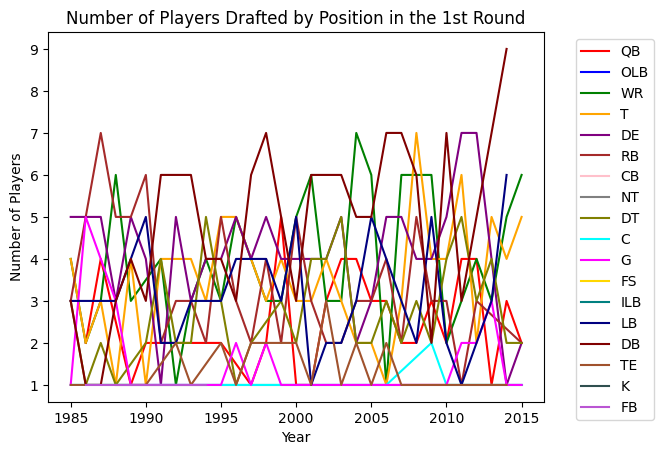

In [5]:
positions = first_round['pos'].unique()

pos_colors = {}
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'gold', 'teal', 'navy', 'maroon', 'sienna', 'darkslategray', 'mediumorchid']
for i, pos in enumerate(positions):
    pos_colors[pos] = colors[i % len(colors)]

fig, ax = plt.subplots()

for pos in positions:
    pos_df = first_round[first_round['pos'] == pos]
    pos_counts = pos_df['year'].value_counts().sort_index()
    ax.plot(pos_counts.index, pos_counts.values, label=pos, color=pos_colors[pos])

ax.set_title('Number of Players Drafted by Position in the 1st Round')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Players')

ax.legend(bbox_to_anchor=(1.05, 1))

plt.show()

In [6]:
first_round = df[df['rnd'] == 1]
pos_counts = first_round['pos'].value_counts()
print(pos_counts)

DB     146
DE     128
WR     114
T      109
RB      98
LB      95
DT      80
QB      69
G       37
TE      29
C       14
NT       5
OLB      4
CB       4
FB       3
FS       1
ILB      1
K        1
Name: pos, dtype: int64


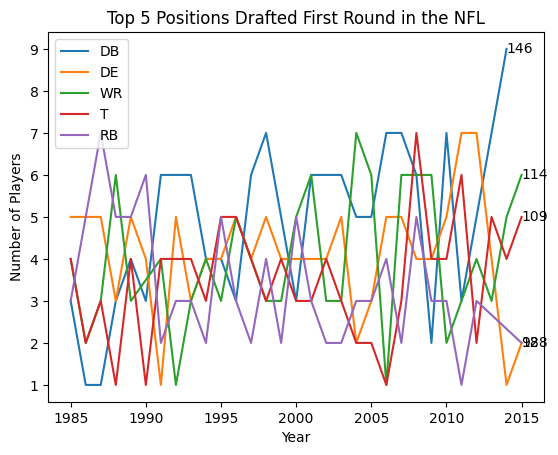

In [7]:
positions = ['DB', 'DE', 'WR', 'T', 'RB']

fig, ax = plt.subplots()

for i, pos in enumerate(positions):
    pos_df = first_round[first_round['pos'] == pos]
    pos_counts = pos_df['year'].value_counts().sort_index()
    ax.plot(pos_counts.index, pos_counts.values, label=pos, color=f"C{i}")

    total_count = pos_counts.sum()
    ax.text(pos_counts.index[-1], pos_counts.values[-1], f"{total_count}", ha="left", va="center")

ax.set_title('Top 5 Positions Drafted First Round in the NFL')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Players')

ax.legend()

plt.show()

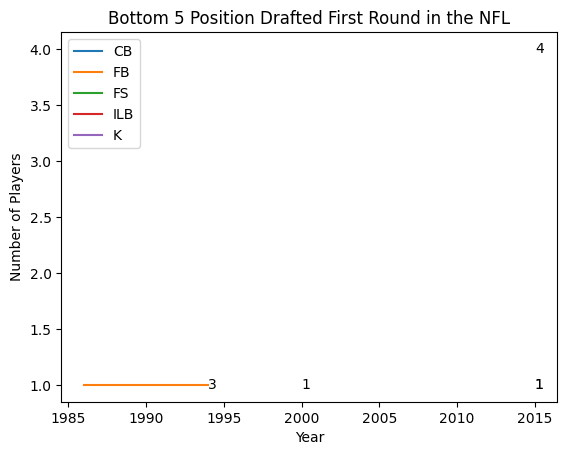

In [8]:
positions = ['CB', 'FB', 'FS', 'ILB', 'K']

fig, ax = plt.subplots()

for i, pos in enumerate(positions):
    pos_df = first_round[first_round['pos'] == pos]
    pos_counts = pos_df['year'].value_counts().sort_index()
    ax.plot(pos_counts.index, pos_counts.values, label=pos, color=f"C{i}")

    total_count = pos_counts.sum()
    ax.text(pos_counts.index[-1], pos_counts.values[-1], f"{total_count}", ha="left", va="center")

ax.set_title('Bottom 5 Position Drafted First Round in the NFL')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Players')

ax.legend()

plt.show()